In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import cross_validation
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)

import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

import sklearn.linear_model

In [26]:
df = pd.read_csv("yellow_tripdata_2015-01-1p.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,Duration,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood
0,1,1/29/15 9:00,1/29/15 9:20,0:20,20,1,1.90,-74.005905,40.735645,1,...,1,13.5,0.0,0.5,1.70,0.00,0.3,16.00,Manhattan,West Village
1,1,1/16/15 21:59,1/16/15 22:09,0:10,10,1,1.30,-73.988808,40.721855,1,...,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15,Manhattan,Lower East Side
2,2,1/9/15 19:29,1/9/15 19:35,0:06,6,1,0.35,-73.980316,40.742496,1,...,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80,Manhattan,Kips Bay
3,1,1/28/15 14:28,1/28/15 14:48,0:20,20,2,7.90,-73.873108,40.774086,1,...,1,24.0,0.0,0.5,0.00,5.33,0.3,30.13,Queens,LaGuardia Airport
4,2,1/22/15 7:08,1/22/15 7:14,0:06,6,1,1.29,-73.961906,40.763901,1,...,1,6.5,0.0,0.5,1.46,0.00,0.3,8.76,Manhattan,Upper East Side


In [27]:
df['log_total_amount'] = df['total_amount'].apply(lambda x: np.log(x))

In [29]:
df['trip_duration'] = df['trip_duration'].convert_objects(convert_numeric=True)

/Users/rajashreebaradur/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [30]:
df[['trip_duration']] = df[['trip_duration']].apply(pd.to_timedelta)

In [31]:
df[['trip_duration']] = df[['trip_duration']].apply(pd.to_numeric)

In [32]:
print df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
Duration                  object
trip_duration            float64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
borough                   object
neighborhood              object
log_total_amount         float64
dtype: object


In [33]:
df.describe()

,VendorID,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,log_total_amount
count,127490.000000,127488.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,1.274530e+05
mean,1.520535,12.095005,1.681567,2.782500,-72.543729,39.962788,1.036921,-72.590987,39.989797,1.385293,11.900871,0.308217,0.497776,1.561781,0.243486,0.283276,14.811335,-inf
std,0.499580,8.592735,1.340551,3.403465,10.188356,5.612579,0.668754,10.020768,5.520446,0.498167,10.110382,0.361912,0.035273,3.353501,1.210873,0.068829,12.514612,NaN
min,1.000000,0.000000,0.000000,0.000000,-75.254013,0.000000,1.000000,-75.254036,0.000000,1.000000,-75.000000,-1.000000,-0.500000,-1.000000,0.000000,0.000000,-75.300000,-inf
25%,1.000000,6.000000,1.000000,1.000000,-73.991631,40.735592,1.000000,-73.991173,40.734398,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,2.099244e+00
50%,2.000000,10.000000,1.000000,1.675000,-73.981575,40.753128,1.000000,-73.979752,40.753632,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000,2.412336e+00
75%,2.000000,16.000000,2.000000,3.000000,-73.966629,40.767555,1.000000,-73.962555,40.768742,2.000000,13.500000,0.500000,0.500000,2.080000,0.000000,0.300000,16.300000,2.791165e+00
max,2.000000,59.000000,6.000000,99.900000,0.000000,41.570671,99.000000,0.000000,41.745903,4.000000,551.110000,7.000000,0.500000,700.000000,29.750000,0.300000,732.300000,6.596190e+00


In [34]:
def get_dt(x):
    return datetime.strptime(x, '%m/%d/%y %H:%M')

df['tpep_pickup_datetime'] = df.apply(lambda x: get_dt(x[1]), axis=1)
df['tpep_dropoff_datetime'] = df.apply(lambda x: get_dt(x[2]), axis=1)

df['tpep_pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
#df['tpep_dropoff_dayofweek'] = df['tpep_dropoff_datetime'].dt.dayofweek

#df['tpep_pickup_time'] = df['tpep_pickup_time'].astype("int")
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#df['tpep_pickup_minuteofday'] = df['tpep_pickup_time'].apply(lambda x: x.hour) * 60 + df['tpep_pickup_time'].apply(lambda x: x.minute)
#df['tpep_dropoff_time'] = df['tpep_dropoff_datetime'].dt.time

In [35]:
df = df.drop(['store_and_fwd_flag',
              'pickup_longitude',
              'pickup_latitude',
              'tpep_pickup_datetime', 
              'tpep_dropoff_datetime',
              'dropoff_longitude',
              'dropoff_latitude'], axis=1)

In [36]:
df = df[df['RateCodeID'] == 1]
df = df[df['borough'] == 'Manhattan']
df = df[df['passenger_count']!= 0]
df = df[df['trip_distance']!= 0]
df = df[df['fare_amount'] > 0]
df = df[df['borough']!= '0']
df.replace([np.inf, -np.inf], np.nan)
df = df[df['log_total_amount'] > 0]
df.head()

,VendorID,Duration,trip_duration,passenger_count,trip_distance,RateCodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood,log_total_amount,tpep_pickup_dayofweek,tpep_pickup_hour
0,1,0:20,20.0,1,1.90,1,1,13.5,0.0,0.5,1.70,0.0,0.3,16.00,Manhattan,West Village,2.772589,3,9
1,1,0:10,10.0,1,1.30,1,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,Manhattan,Lower East Side,2.411439,4,21
2,2,0:06,6.0,1,0.35,1,2,5.0,1.0,0.5,0.00,0.0,0.3,6.80,Manhattan,Kips Bay,1.916923,4,19
4,2,0:06,6.0,1,1.29,1,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76,Manhattan,Upper East Side,2.170196,3,7
5,1,0:17,17.0,1,1.30,1,1,11.5,0.0,0.5,2.45,0.0,0.3,14.75,Manhattan,Upper East Side,2.691243,1,13


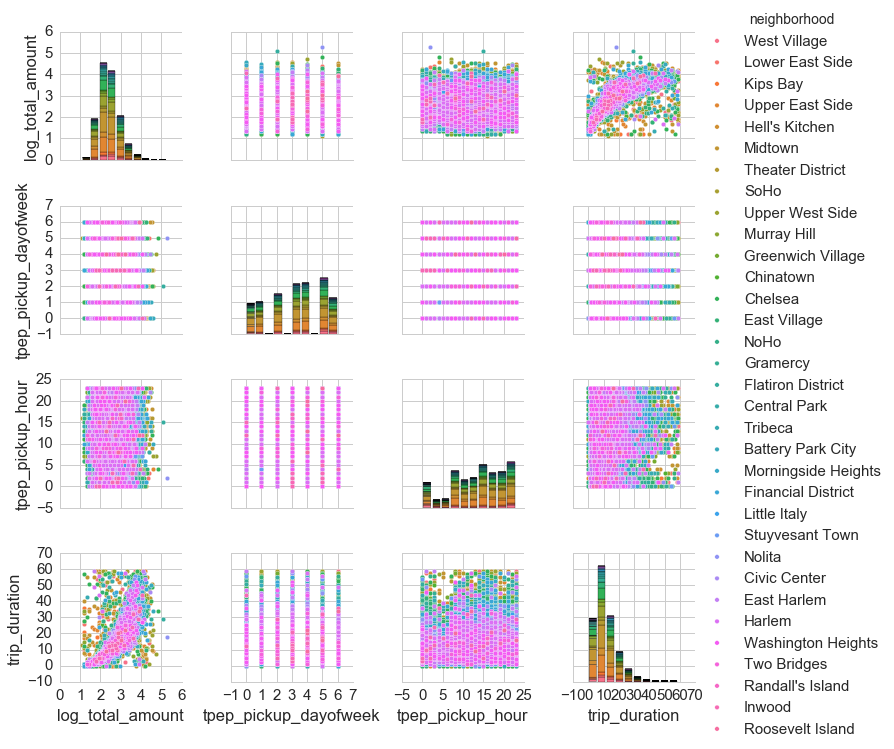

In [37]:
g = sns.pairplot(df, vars=['log_total_amount', 'tpep_pickup_dayofweek', 'tpep_pickup_hour', 'trip_duration'], hue="neighborhood")

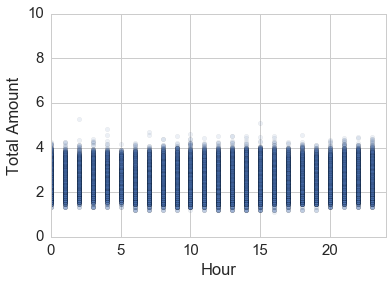

In [38]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_hour', y='log_total_amount', alpha=0.1)
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.axis([0, 24, 0, 10])
plt.grid(True)
plt.show()

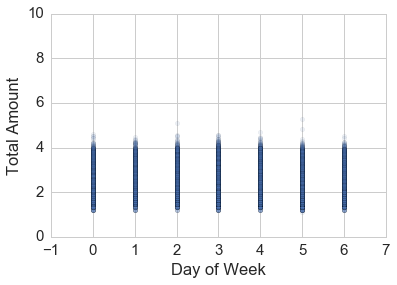

In [39]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_dayofweek', y='log_total_amount', alpha=0.1)
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')
plt.axis([-1, 7, 0, 10])
plt.grid(True)
plt.show()

(0, 10)

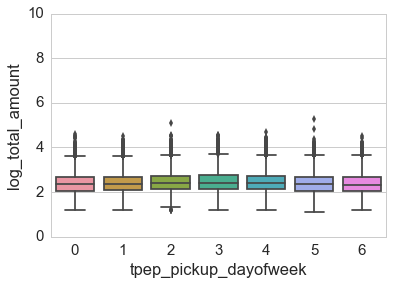

In [40]:
sns.boxplot(x='tpep_pickup_dayofweek', y='log_total_amount', data=df)
plt.ylim(0, 10)

(0, 10)

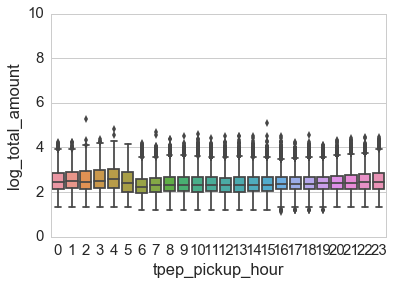

In [41]:
sns.boxplot(x='tpep_pickup_hour', y='log_total_amount', data=df)
plt.ylim(0, 10)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
#to convert into numbers
df.neighborhood = le.fit_transform(df.neighborhood)
df.head()

In [42]:
df = df.join(pd.get_dummies(df['tpep_pickup_hour'], prefix='hour'))
df = df.join(pd.get_dummies(df['tpep_pickup_dayofweek'], prefix='week'))
df = df.join(pd.get_dummies(df['neighborhood'], prefix='n'))
df.head()

,VendorID,Duration,trip_duration,passenger_count,trip_distance,RateCodeID,payment_type,fare_amount,extra,mta_tax,...,n_Roosevelt Island,n_SoHo,n_Stuyvesant Town,n_Theater District,n_Tribeca,n_Two Bridges,n_Upper East Side,n_Upper West Side,n_Washington Heights,n_West Village
0,1,0:20,20.0,1,1.90,1,1,13.5,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0:10,10.0,1,1.30,1,1,8.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0:06,6.0,1,0.35,1,2,5.0,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0:06,6.0,1,1.29,1,1,6.5,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,0:17,17.0,1,1.30,1,1,11.5,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
df.describe()

,VendorID,trip_duration,passenger_count,trip_distance,RateCodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,...,n_Roosevelt Island,n_SoHo,n_Stuyvesant Town,n_Theater District,n_Tribeca,n_Two Bridges,n_Upper East Side,n_Upper West Side,n_Washington Heights,n_West Village
count,114539.000000,114539.000000,114539.000000,114539.000000,114539.0,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,...,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000
mean,1.526677,11.304368,1.686997,2.237189,1.0,1.381564,10.312785,0.313631,0.499952,1.335932,...,0.000044,0.022673,0.005300,0.041794,0.018492,0.000218,0.158147,0.099110,0.001091,0.038415
std,0.499290,7.364725,1.347041,2.099419,0.0,0.492839,6.249022,0.364337,0.004900,1.656689,...,0.006607,0.148861,0.072605,0.200118,0.134721,0.014772,0.364880,0.298811,0.033017,0.192196
min,1.000000,0.000000,1.000000,0.010000,1.0,1.000000,2.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,1.000000,0.990000,1.0,1.000000,6.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,10.000000,1.000000,1.600000,1.0,1.000000,8.500000,0.000000,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,15.000000,2.000000,2.700000,1.0,2.000000,12.500000,0.500000,0.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,59.000000,6.000000,48.900000,1.0,4.000000,129.000000,7.000000,0.500000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df = df.drop(['VendorID',
              'neighborhood',
              'RateCodeID',
              'tpep_pickup_dayofweek',
              'tpep_pickup_hour',
              'borough'], axis=1)

In [45]:
df.dtypes

Duration                  object
trip_duration            float64
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
log_total_amount         float64
hour_0                   float64
hour_1                   float64
hour_2                   float64
hour_3                   float64
hour_4                   float64
hour_5                   float64
hour_6                   float64
hour_7                   float64
hour_8                   float64
hour_9                   float64
hour_10                  float64
hour_11                  float64
hour_12                  float64
hour_13                  float64
hour_14                  float64
hour_15                  float64
hour_16                  float64
          

                       trip_duration  passenger_count  trip_distance  \
trip_duration               1.000000         0.012932       0.737443   
passenger_count             0.012932         1.000000       0.013355   
trip_distance               0.737443         0.013355       1.000000   
payment_type               -0.075840         0.012447      -0.073015   
fare_amount                 0.877855         0.012868       0.955220   
extra                       0.001406         0.004660       0.043392   
mta_tax                     0.000647         0.001030       0.000089   
tip_amount                  0.407481        -0.009920       0.461008   
tolls_amount                0.213565         0.005445       0.428788   
improvement_surcharge       0.026885         0.045664      -0.014681   
total_amount                0.842091         0.009260       0.939281   
log_total_amount            0.874181         0.009371       0.854448   
hour_0                      0.003676         0.008778       0.05

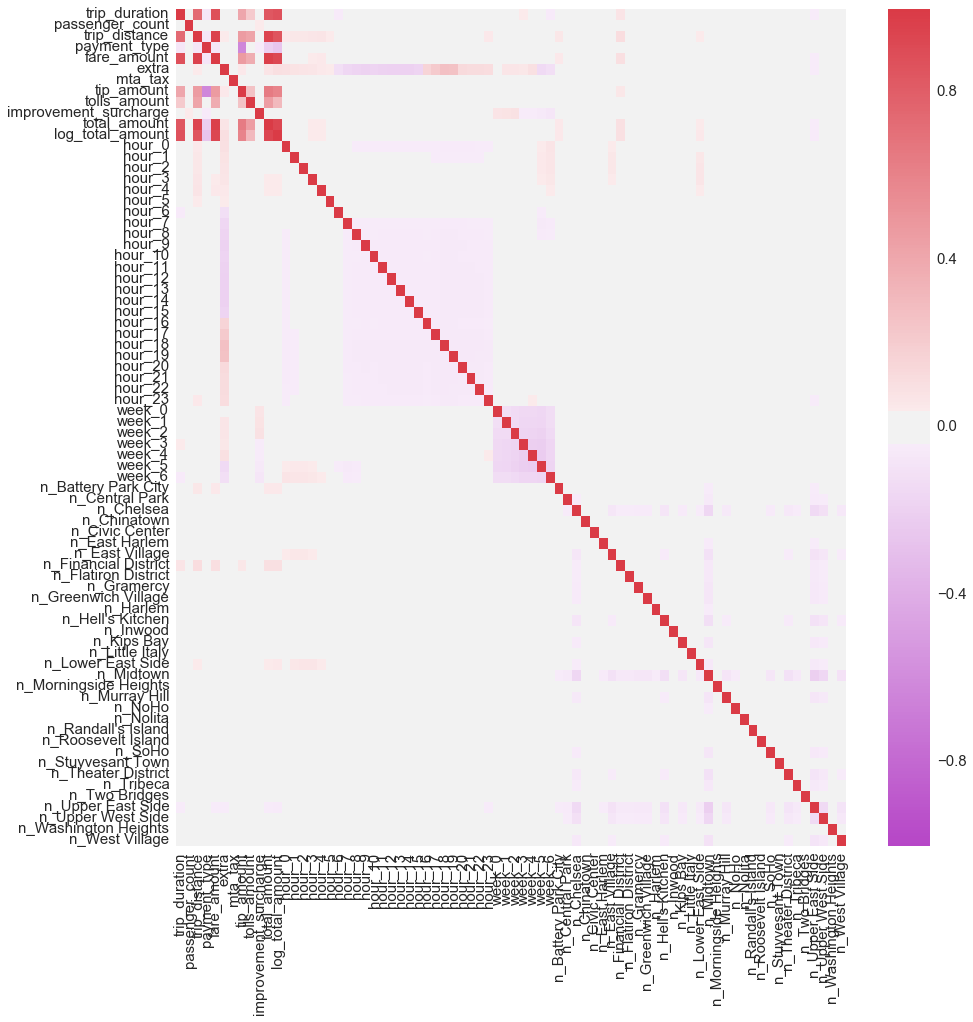

In [46]:
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(300, 10, as_cmap=True)

correlations = df.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap, ax=ax)

In [47]:
import statsmodels.formula.api as smf

y = df['log_total_amount']
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23 + week_0 + week_1 + week_2 + week_3 + week_4 + week_5 + week_6' , data=df).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     84.74
Date:                Fri, 29 Jul 2016   Prob (F-statistic):               0.00
Time:                        23:39:49   Log-Likelihood:             1.6208e+05
No. Observations:              114539   AIC:                        -3.241e+05
Df Residuals:                  114509   BIC:                        -3.238e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -7.412e+09   2.14e+10     -0.346      0.729     -4.93e+10  3.45e+10
hour_0         0.0129      0.001     10.785      0.000         0.011     0.015
hour_1         0.0152      0.001     11.429      0.000         0.013     0.018
hour_2         0.0156      0.002      9.291      0.000         0.012     0.019
hour_3         0.0200      0.002     12.424      0.000         0.017     0.023
hour_4         0.0227      0.002     12.193      0.000         0.019     0.026
hour_5         0.0068      0.002      3.425      0.001         0.003     0.011
hour_6        -0.0149      0.001    -10.249      0.000        -0.018    -0.012
hour_7        -0.0101      0.001     -8.313      0.000        -0.013    -0.008
hour_8        -0.0058      0.001     -5.080      0.000        -0.008    -0.004
hour_9        -0.0057      0.001     -5.111      0.000        -0.008    -0.003
hour_10       -0.0073      0.001     -6.535      0.000        -0.009    -0.005
hour_11       -0.0065      0.001     -5.928      0.000        -0.009    -0.004
hour_12       -0.0086      0.001     -7.958      0.000        -0.011    -0.006
hour_13       -0.0070      0.001     -6.429      0.000        -0.009    -0.005
hour_14       -0.0065      0.001     -6.001      0.000        -0.009    -0.004
hour_15       -0.0048      0.001     -4.455      0.000        -0.007    -0.003
hour_16       -0.0015      0.001     -1.372      0.170        -0.004     0.001
hour_18        0.0021      0.001      2.034      0.042      7.58e-05     0.004
hour_19        0.0015      0.001      1.478      0.140        -0.000     0.004
hour_20        0.0027      0.001      2.554      0.011         0.001     0.005
hour_21        0.0050      0.001      4.685      0.000         0.003     0.007
hour_22        0.0086      0.001      8.079      0.000         0.007     0.011
hour_23        0.0103      0.001      9.170      0.000         0.008     0.012
week_0      7.412e+09   2.14e+10      0.346      0.729     -3.45e+10  4.93e+10
week_1      7.412e+09   2.14e+10      0.346      0.729     -3.45e+10  4.93e+10
week_2      7.412e+09   2.14e+10      0.346      0.729     -3.45e+10  4.93e+10
week_3      7.412e+09   2.14e+10      0.346      0.729     -3.45e+10  4.93e+10
week_4      7.412e+09   2.14e+10      0.346      0.729     -3.45e+10  4.93e+10
week_5      7.412e+09   2.14e+10      0.346      0.729     -3.45e+10  4.93e+10
week_6      7.412e+09   2.14e+10      0.346      0.729     -3.45e+10  4.93e+10
==============================================================================
Omnibus:                      654.103   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.307
Skew:                           0.180   Prob(JB):                    6.81e-144
Kurtosis:                       2.904   Cond. No.                     3.81e+14
==

In [61]:
# Set target variable name
target = 'log_total_amount'

# Set X and y
X = df.drop([target, 'hour_16', 'hour_17','hour_19','week_0','week_1','week_1','week_2','week_3','week_4','week_5','week_6','total_amount', 'Duration', 'tip_amount', 'fare_amount', 'extra', 'tolls_amount','payment_type', 'improvement_surcharge', 'passenger_count', 'mta_tax'], axis=1)
y = df[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)


# check size of training set
print X_train.shape, y_train.shape

# check size of test set
print X_test.shape, y_test.shape

(68723, 56) (68723,)
(45816, 56) (45816,)


Axes(0.125,0.125;0.775x0.775)


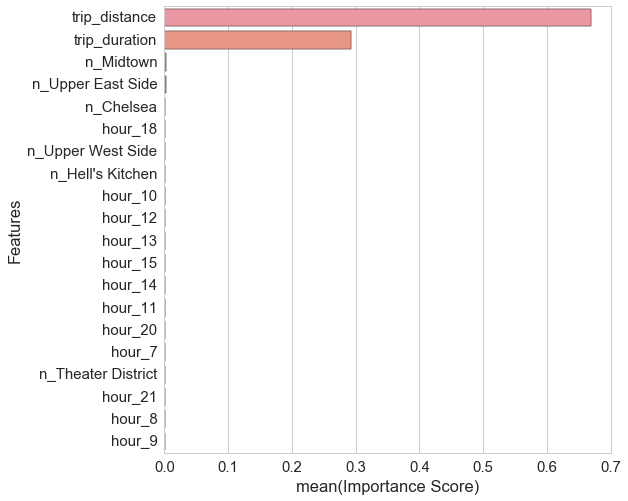

In [62]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# random forest code
rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, n_jobs=-1)
# fit the training data
#print('fitting the model')
rf.fit(X_train, y_train)

# Plot feature importances
feature_names = X.columns
feature_importances = rf.feature_importances_
feature_dict = dict(zip(feature_names, feature_importances))

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)

f, ax = plt.subplots(figsize=(8, 8))
print sns.barplot(y='Features', x='Importance Score', data=features_df, ax=ax)
sns.barplot(y='Features', x='Importance Score', data=features_df.head(20))

In [67]:
new_test = X.sample(1)

print new_test

pred_for_new_test = rf.predict(new_test)

print pred_for_new_test

        trip_duration  trip_distance  hour_0  hour_1  hour_2  hour_3  hour_4  \
124713            9.0           2.52     0.0     0.0     0.0     0.0     0.0   

        hour_5  hour_6  hour_7       ...        n_Roosevelt Island  n_SoHo  \
124713     0.0     0.0     0.0       ...                       0.0     0.0   

        n_Stuyvesant Town  n_Theater District  n_Tribeca  n_Two Bridges  \
124713                0.0                 0.0        0.0            0.0   

        n_Upper East Side  n_Upper West Side  n_Washington Heights  \
124713                0.0                1.0                   0.0   

        n_West Village  
124713             0.0  

[1 rows x 56 columns]
[ 2.50075493]
